# Chapter 3 - Ideal Fluids

Code used to generate figures and examples from Chapter 3 of [*Introduction to Fluid Dynamics*, by Joseph D. MacMillan](https://josephmacmillan.github.io/IntroductionToFluidDynamics/).  This work is licensed under a [Creative Commons Attribution-ShareAlike 4.0
International License.](https://creativecommons.org/licenses/by-sa/4.0/)

In [1]:
%matplotlib inline

import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import sympy as sp

rc('text.latex',preamble='\\usepackage{libertine}\n\\usepackage[libertine]{newtxmath}')
rc('font',**{'family':'serif','serif':['Linux Libertine O']}, size=18)
rc('text', usetex=True)

## Figure 3.4:  Uniformly rotating fluid

A 3D plot for the shape of the free surface of a rotating fluid.  It's given by
$$
z = \frac{\Omega^2}{2g} (x^2 + y^2) + \left( \frac{p_1 - p_0}{\rho g} \right).
$$

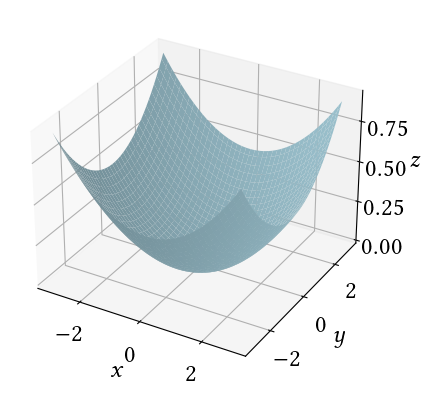

In [5]:
Omega = 1.0
g = 9.8

def fun(x, y):
  return 0.5 * Omega**2 / g * (x**2 + y**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx = np.arange(-3.0, 3.0, 0.05)
yy = np.arange(-3.0, 3.0, 0.05)
xx, yy = np.meshgrid(xx, yy)
zz = fun(xx, yy)

ax.plot_surface(xx, yy, zz, color="lightblue")

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

plt.savefig("fig_paraboloid.pdf")

## Figure 3.6: Streamlines for flow past a cylinder

This uses the stream function to plot the streamlines, which can be found from the velocities $u_s$ and $u_\phi$, and is
$$
\psi = U \left( s - \frac{a^2}{s} \right) \sin \phi.
$$


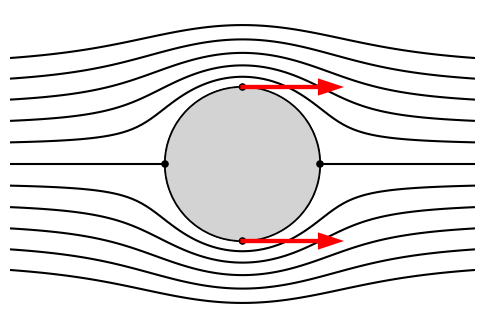

In [4]:
U = 0.4
a = 1.0

xx = np.linspace(-3.0, 3.0, 100)
yy = np.linspace(-2.0, 2.0, 100)
xx, yy = np.meshgrid(xx, yy)

s = np.sqrt(xx**2 + yy**2)
sin_phi = yy / s 
phi = np.arctan(yy/xx)
psi = U * (s - a**2 / s) * sin_phi

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('off')
levs = np.linspace(-0.5, 0.5, 11)
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
plt.contour(xx, yy, psi, colors='black', levels=levs, zorder=1)
circ = plt.Circle((0,0),radius=a,fc='lightgrey', fill=True, alpha=1, zorder=2, color="black")
ax.add_patch(circ)


ax.add_patch(plt.Circle((0,1),radius=0.04,fc='black', fill=True, alpha=1, zorder=2, color="black"))
plt.arrow(0, 1, 1, 0, color="red", lw=3, head_width=0.15, zorder=3)

ax.add_patch(plt.Circle((0,-1),radius=0.04,fc='black', fill=True, alpha=1, zorder=2, color="black"))
plt.arrow(0, -1, 1, 0, color="red", lw=3, head_width=0.15, zorder=3)

ax.add_patch(plt.Circle((1,0),radius=0.04,fc='black', fill=True, alpha=1, zorder=2, color="black"))
ax.add_patch(plt.Circle((-1,0),radius=0.04,fc='black', fill=True, alpha=1, zorder=2, color="black"))

plt.savefig("fig_cylinder_stream.pdf", bbox_inches='tight')

## Figure 3.7: Pressure

I plot the pressure, as a heat map, along the streamlines.  The pressure is given by
$$
p = p_\infty + \frac{1}{2} \rho U^2 \frac{a^2}{s^2} \left( 2 \cos 2 \phi - \frac{a^2}{s^2} \right).
$$
That's in cylindrical coordinates, if we convert to Cartesian, it becomes
$$
p = p_\infty + \frac{1}{2} \rho a^2 U^2 \left( \frac{2x^2 - 2y^2 - a^2}{(x^2 + y^2)^2} \right).
$$


[[0.00426036 0.00424978 0.00423904 ... 0.00423904 0.00424978 0.00426036]
 [0.00428605 0.00427556 0.0042649  ... 0.0042649  0.00427556 0.00428605]
 [0.0043118  0.0043014  0.00429083 ... 0.00429083 0.0043014  0.0043118 ]
 ...
 [0.0043118  0.0043014  0.00429083 ... 0.00429083 0.0043014  0.0043118 ]
 [0.00428605 0.00427556 0.0042649  ... 0.0042649  0.00427556 0.00428605]
 [0.00426036 0.00424978 0.00423904 ... 0.00423904 0.00424978 0.00426036]] 0.07999871744515073 -471477404.01949924


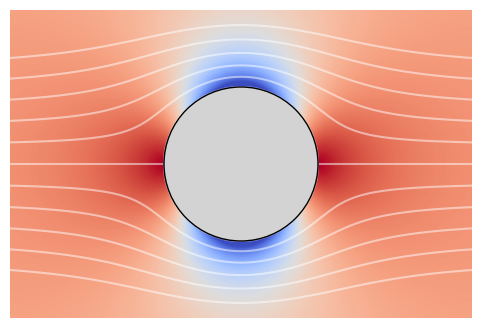

In [11]:
def p(x, y):
    rho = 1.0
    r2 = x**2 + y**2
    s = np.sqrt(x**2 + y**2)
        
    return 0.5 * rho * a**2 * U**2 * (2*x**2 - 2*y**2 - a**2) / s**4
    
x = np.linspace(-3, 3, 1000)
y = np.linspace(-2, 2, 1000)

X, Y = np.meshgrid(x, y)
P = p(X, Y)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)

print(P, np.max(P), np.min(P))

plt.imshow(P, extent=[-3, 3, -2, 2], origin='lower', cmap='coolwarm', alpha=1, vmin = -0.2, vmax = 0.08)

plt.axis('off')

circ = plt.Circle((0,0),radius=a,fc='lightgrey', fill=True, alpha=1, zorder=3, color="black")
ax.add_patch(circ)

plt.contour(xx, yy, psi, colors='white', levels=levs, alpha=0.5)

plt.savefig("fig_cylinder_pressure.pdf", bbox_inches='tight')